              Rooms  Living Space (sqm)         Price  \
count  13140.000000        13140.000000  1.314000e+04   
mean       5.056393          147.101903  1.245600e+06   
std        2.162771           80.456189  5.237698e+06   
min        1.500000            1.000000  1.000000e+00   
25%        3.500000          100.000000  6.700000e+05   
50%        4.500000          129.000000  9.450000e+05   
75%        5.500000          170.000000  1.395000e+06   
max       75.000000          970.000000  5.900000e+08   

       Distance from nearest station (m)  Price_per_SquareMeter  
count                       13140.000000           1.314000e+04  
mean                         1716.303501           8.710571e+03  
std                           852.644467           5.035732e+04  
min                             3.000000           1.851852e-03  
25%                           976.000000           5.708018e+03  
50%                          1694.000000           7.296608e+03  
75%                     

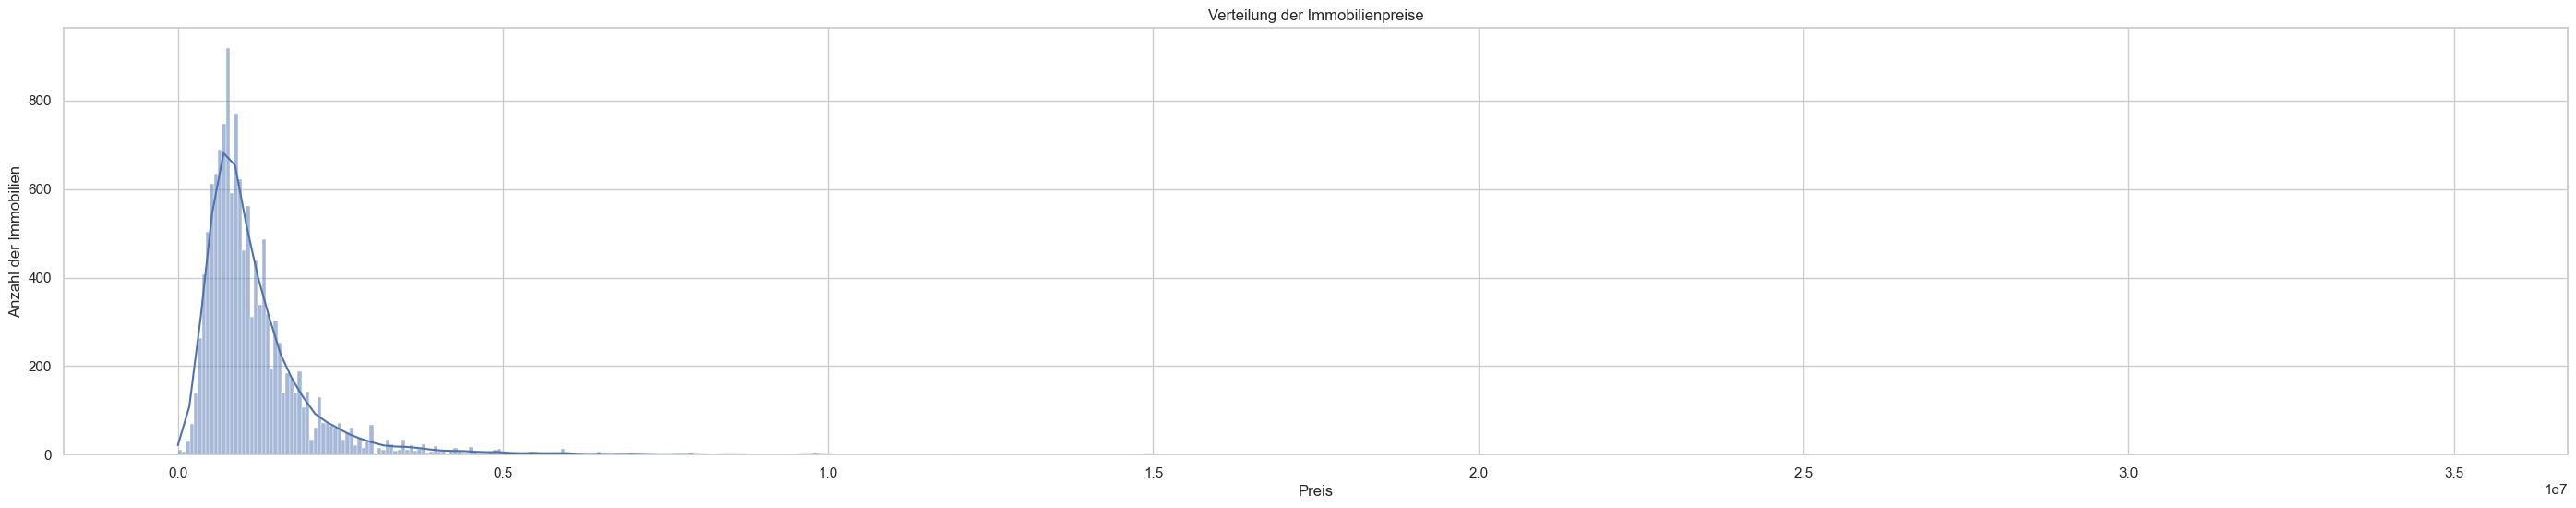

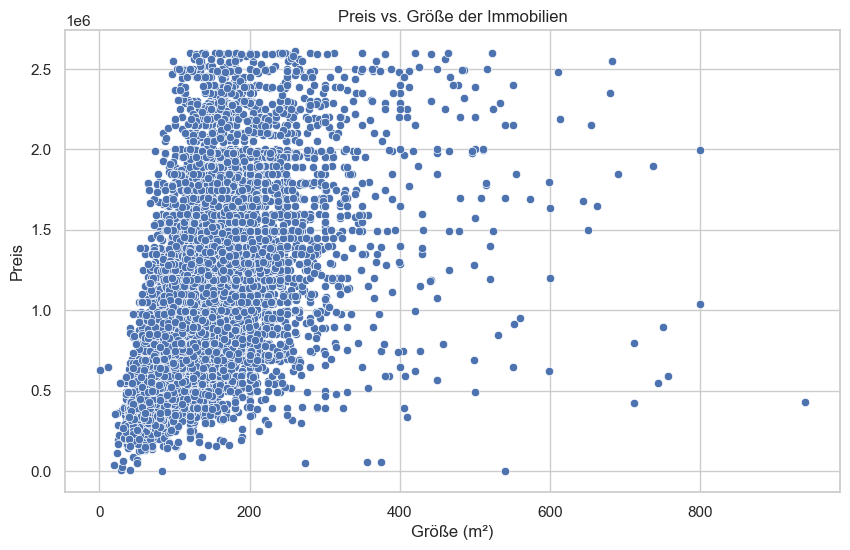

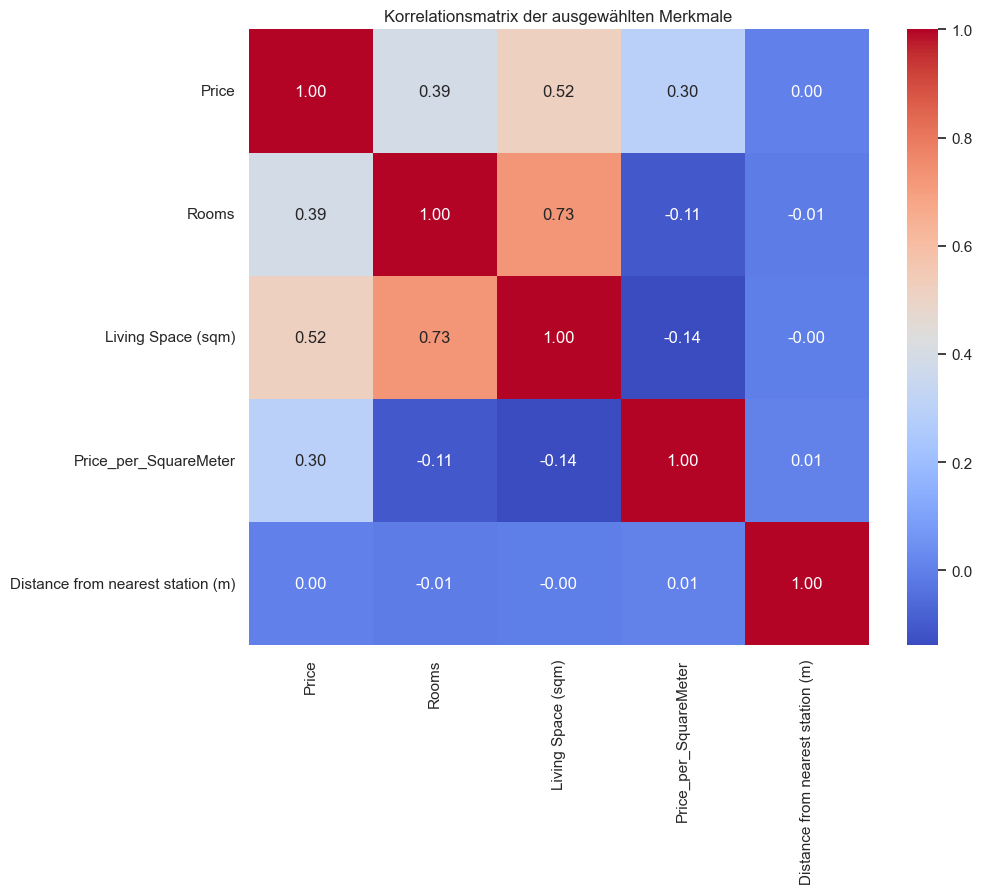

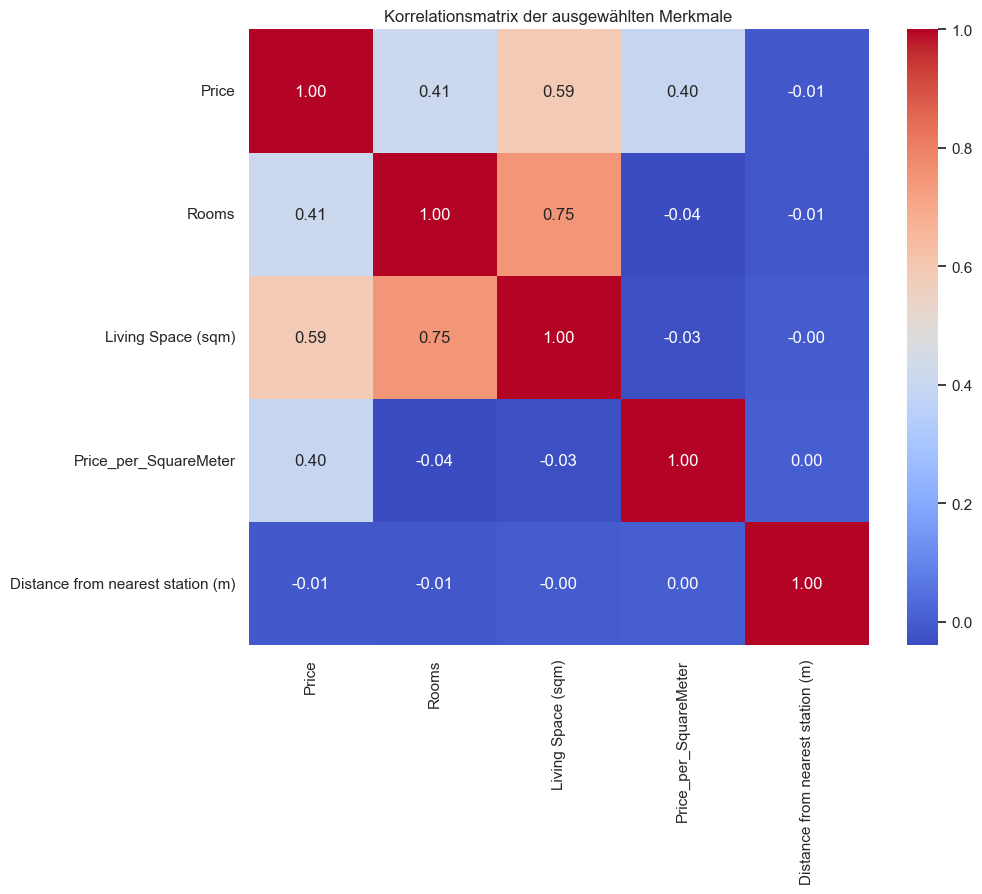

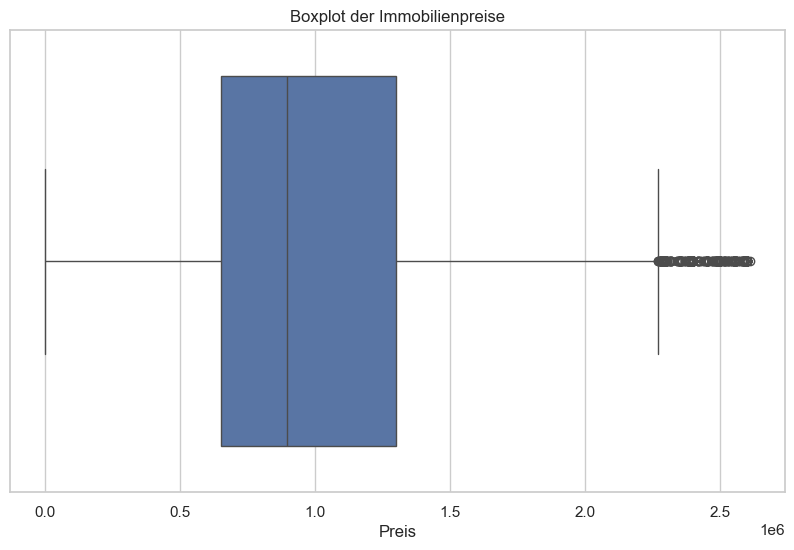

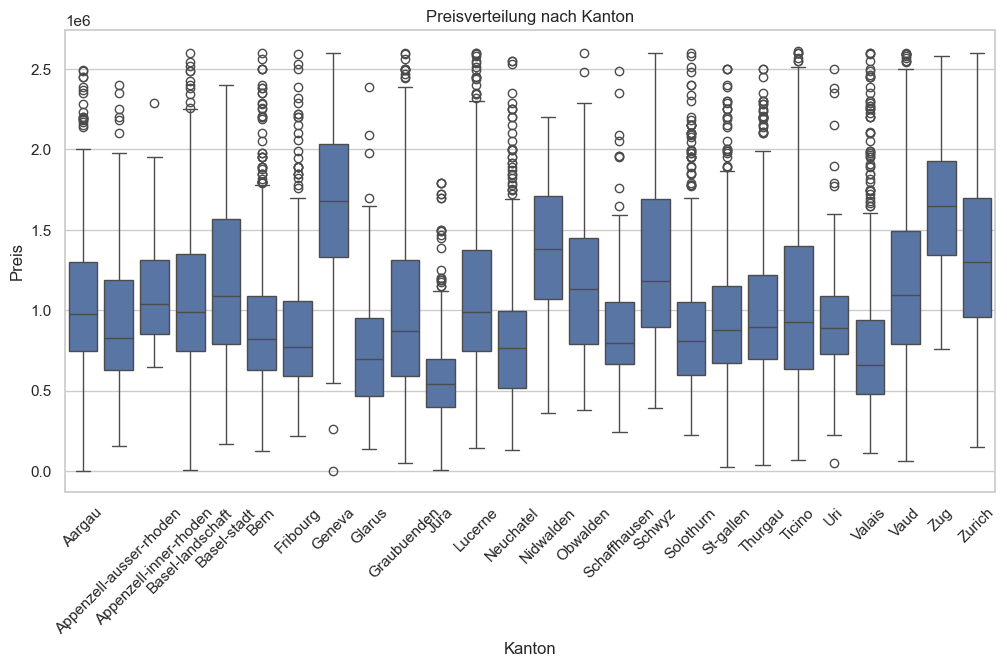

canton
Geneva                     1.686831e+06
Zug                        1.644578e+06
Nidwalden                  1.391944e+06
Zurich                     1.368911e+06
Schwyz                     1.291921e+06
Obwalden                   1.210522e+06
Vaud                       1.177403e+06
Basel-stadt                1.168641e+06
Appenzell-inner-rhoden     1.150526e+06
Lucerne                    1.120551e+06
Basel-landschaft           1.083276e+06
Ticino                     1.074807e+06
Aargau                     1.066865e+06
Graubuenden                1.004468e+06
Thurgau                    9.990785e+05
Uri                        9.747848e+05
Appenzell-ausser-rhoden    9.575902e+05
St-gallen                  9.436284e+05
Bern                       9.089299e+05
Solothurn                  8.939195e+05
Schaffhausen               8.929510e+05
Fribourg                   8.555162e+05
Neuchatel                  8.244598e+05
Glarus                     7.801389e+05
Valais                     7.7679

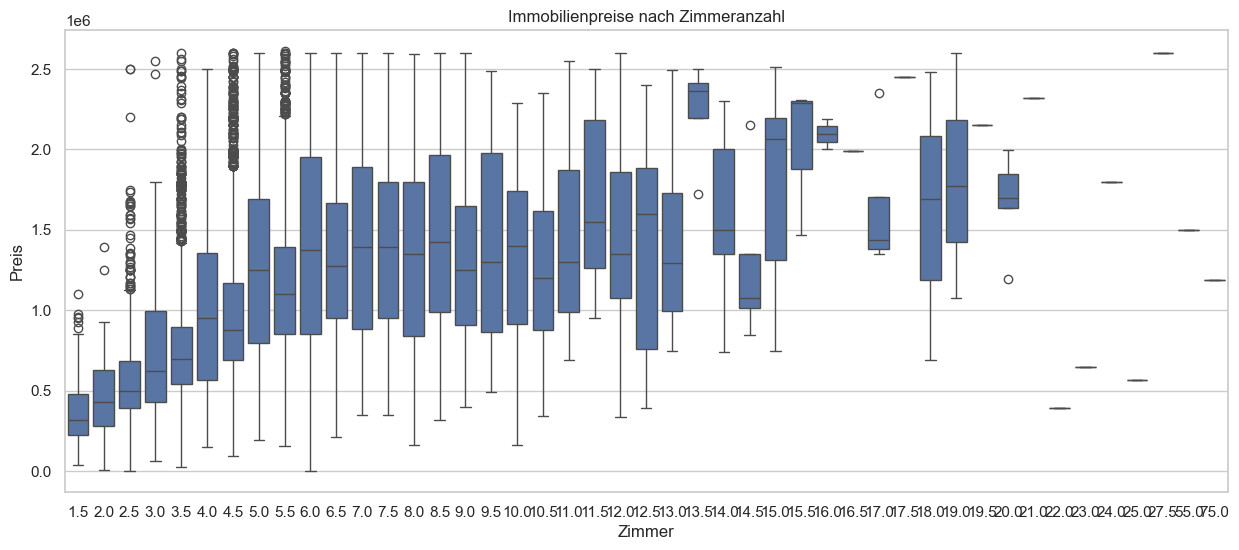

In [14]:
#Datenanalyse und Visualisierung
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df_clean = pd.read_csv('LAST_Final_cleaned_immodata.csv', sep=';')
df_filtered= pd.read_csv('LAST_Final_Filtered_immodata.csv', sep=';')
# Stil für die Plots festlegen
sns.set(style="whitegrid")

print(df_clean.describe())
print(df_clean.info())

max_price = df_clean['Price'].max()
print("Maximaler Preis im Datensatz: ", max_price)

#Max Preis aus df_clean entfernen 
df_clean = df_clean[df_clean['Price'] != max_price]

# Histogramm der Preise
plt.figure(figsize=(35, 6))
sns.histplot(df_clean['Price'], kde=True)
plt.title('Verteilung der Immobilienpreise')
plt.xlabel('Preis')
plt.ylabel('Anzahl der Immobilien')
plt.show()

# Scatter Plot für Preis vs. Größe
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Living Space (sqm)', y='Price', data=df_filtered)
plt.title('Preis vs. Größe der Immobilien')
plt.xlabel('Größe (m²)')
plt.ylabel('Preis')
plt.show()

# Korrelationsmatrix ohne Ausreisser
relevant_columns = ['Price', 'Rooms', 'Living Space (sqm)', 'Price_per_SquareMeter', 'Distance from nearest station (m)']
correlation_matrix = df_filtered[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix der ausgewählten Merkmale')
plt.show()

# Korrelationsmatrix mit ausreisser ausser max Preis
relevant_columns = ['Price', 'Rooms', 'Living Space (sqm)', 'Price_per_SquareMeter', 'Distance from nearest station (m)']
correlation_matrix = df_clean[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix der ausgewählten Merkmale')
plt.show()


# Angenommen, Ihr DataFrame heißt df
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Price'])
plt.title('Boxplot der Immobilienpreise')
plt.xlabel('Preis')
plt.show()


# Überblick über die Preisverteilung nach Kanton
plt.figure(figsize=(12, 6))
sns.boxplot(x='canton', y='Price', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Preisverteilung nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Preis')
plt.show()

# Durchschnittspreise nach Kanton berechnen
kanton_preise = df_filtered.groupby('canton')['Price'].mean().sort_values(ascending=False)
print(kanton_preise)

# Boxplot für Preise nach Zimmerzah
plt.figure(figsize=(15, 6))
sns.boxplot(x='Rooms', y='Price', data=df_filtered)
plt.title('Immobilienpreise nach Zimmeranzahl')
plt.xlabel('Zimmer')
plt.ylabel('Preis')
plt.show()



In [15]:
print(df_clean.columns)

Index(['Address', 'Title', 'Description', 'Rooms', 'Living Space (sqm)',
       'Price', 'canton', 'Distance from nearest station (m)',
       'Price_per_SquareMeter'],
      dtype='object')


Lineare Regression zur Datenanalyse


Spaltennamen vor get_dummies: Index(['Address', 'Title', 'Description', 'Rooms', 'Living Space (sqm)',
       'Price', 'canton', 'Distance from nearest station (m)',
       'Price_per_SquareMeter'],
      dtype='object')
Spaltennamen nach get_dummies: Index(['Address', 'Title', 'Description', 'Rooms', 'Living Space (sqm)',
       'Price', 'Distance from nearest station (m)', 'Price_per_SquareMeter',
       'canton_Appenzell-ausser-rhoden', 'canton_Appenzell-inner-rhoden',
       'canton_Basel-landschaft', 'canton_Basel-stadt', 'canton_Bern',
       'canton_Fribourg', 'canton_Geneva', 'canton_Glarus',
       'canton_Graubuenden', 'canton_Jura', 'canton_Lucerne',
       'canton_Neuchatel', 'canton_Nidwalden', 'canton_Obwalden',
       'canton_Schaffhausen', 'canton_Schwyz', 'canton_Solothurn',
       'canton_St-gallen', 'canton_Thurgau', 'canton_Ticino', 'canton_Uri',
       'canton_Valais', 'canton_Vaud', 'canton_Zug', 'canton_Zurich'],
      dtype='object')
Datentypen der Prädiktoren: 

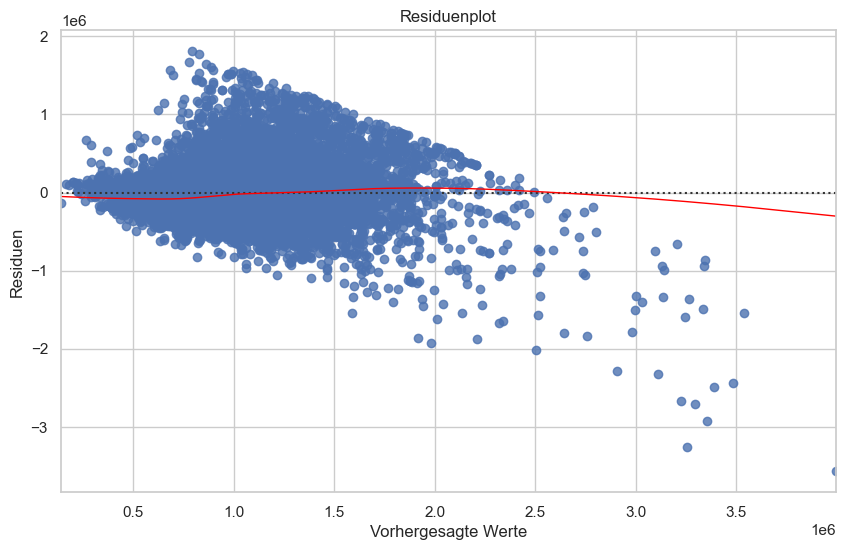

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Stil für die Plots festlegen
sns.set(style="whitegrid")

# Daten laden
df_clean = pd.read_csv('LAST_Final_cleaned_immodata.csv', sep=';')
df_filtered = pd.read_csv('LAST_Final_Filtered_immodata.csv', sep=';')

# Entfernen des Maximalpreises
max_price = df_clean['Price'].max()
df_clean = df_clean[df_clean['Price'] != max_price]

# Entfernen von Zeilen mit fehlenden Werten in relevanten Spalten
df_filtered = df_filtered.dropna(subset=['Price', 'Rooms', 'Living Space (sqm)', 'Distance from nearest station (m)', 'canton'])

# Sicherstellen, dass die relevanten Spalten numerisch sind
numeric_columns = ['Price', 'Rooms', 'Living Space (sqm)', 'Distance from nearest station (m)']
df_filtered[numeric_columns] = df_filtered[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Überprüfen der Spaltennamen
print("Spaltennamen vor get_dummies:", df_filtered.columns)

# Umwandeln der "Canton"-Variable in Dummy-Variablen
df_filtered = pd.get_dummies(df_filtered, columns=['canton'], drop_first=True)

# Konvertieren der Dummy-Variablen in int
dummy_columns = [col for col in df_filtered.columns if col.startswith('canton_')]
df_filtered[dummy_columns] = df_filtered[dummy_columns].astype(int)

# Überprüfen der Spaltennamen nach get_dummies
print("Spaltennamen nach get_dummies:", df_filtered.columns)

# Prädiktoren (ohne 'Price_per_SquareMeter')
predictors = ['Rooms', 'Living Space (sqm)', 'Distance from nearest station (m)'] + dummy_columns
X = df_filtered[predictors]
y = df_filtered['Price']

# Hinzufügen eines konstanten Terms (Intercept)
X = sm.add_constant(X)

# Überprüfen der Datentypen
print("Datentypen der Prädiktoren:", X.dtypes)
print("Datentyp der Zielvariablen:", y.dtypes)

# OLS-Regression durchführen
model = sm.OLS(y, X).fit()

# Zusammenfassung der Regressionsergebnisse anzeigen
print(model.summary())

# Plotten der Residuen
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuenplot')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Residuen')
plt.show()


Ergebnisse Interpretation:

Modellgüte: 
- R-suqared von 0.473 bedeutet, dass 47.3% der Varianz des Immobilienpreises durch die Modellvariablen erklärt werden. -> Moderater Wert d.h es gibt noch Raum für Verbesserungen (mehr Datenpunkte)

Signifikanz der Variablen: 
- Konstante (const): Der Koeffizient von etwa 456,700 ist signifikant (p < 0.05), was das Basispreisniveau darstellt, wenn alle anderen Prädiktoren Null sind.
- Rooms: Ein positiver Koeffizient (8,400) zeigt, dass mit jedem zusätzlichen Zimmer der Preis um etwa 8,400 CHF steigt. Dies ist logisch und erwartet.
- Living Space (sqm): Ein positiver Koeffizient (3,926) zeigt, dass mit jedem zusätzlichen Quadratmeter Wohnfläche der Preis um etwa 3,926 CHF steigt. Dies ist ebenfalls erwartet und logisch.
- Distance from nearest station (m): Der Koeffizient ist nicht signifikant (p = 0.183), was darauf hinweist, dass die Entfernung zur nächsten Station keinen starken Einfluss auf den Preis hat.

Signifikante Kantone: Viele Kantone haben signifikante Koeffizienten, was darauf hindeutet, dass der Standort einen starken Einfluss auf den Preis hat. Zum Beispiel:
- Genf (619,400): Immobilien in Genf sind im Durchschnitt um 619,400 CHF teurer als im Referenzkanton.
- Zürich (337,200): Immobilien in Zürich sind im Durchschnitt um 337,200 CHF teurer als im Referenzkanton.
- Jura (-505,600): Immobilien im Jura sind im Durchschnitt um 505,600 CHF günstiger als im Referenzkanton.

Multikollinearität: Die hohe Konditionsnummer weist auf mögliche Multikollinearitätsprobleme hin.

In [20]:
#Prüfung der Multikollinearität

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Berechnung des VIF für jedes Merkmal
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


                              feature        VIF
0                               const  25.339057
1                               Rooms   2.176165
2                  Living Space (sqm)   2.163505
3   Distance from nearest station (m)   1.011665
4      canton_Appenzell-ausser-rhoden   1.137333
5       canton_Appenzell-inner-rhoden   1.021439
6             canton_Basel-landschaft   1.838094
7                  canton_Basel-stadt   1.166864
8                         canton_Bern   1.857261
9                     canton_Fribourg   1.908840
10                      canton_Geneva   1.543647
11                      canton_Glarus   1.081302
12                 canton_Graubuenden   1.693917
13                        canton_Jura   1.465724
14                     canton_Lucerne   1.534029
15                   canton_Neuchatel   1.675520
16                   canton_Nidwalden   1.040280
17                    canton_Obwalden   1.051417
18                canton_Schaffhausen   1.170106
19                  

Keine Hohe Multikollinearität d.h es könnte sich um nicht linear Beziehung zwischen den Variabeln handeln oder mehr Daten benötigt werden wie bspw. Ausbaustandard, Baujahr, Balkon etc.

Datenanalyse für kleine Datenmenge (wird nicht für ML verwendet und dient zum Vergleich)

            Rooms  Living Space (sqm)         Price  Price_per_SquareMeter
count  902.000000          902.000000  9.020000e+02             902.000000
mean     4.171840          120.022173  1.011486e+06            8338.759873
std      1.388019           50.710814  7.217144e+05            3729.561645
min      1.500000           31.000000  1.500000e+05            1385.542169
25%      3.500000           90.000000  6.000000e+05            6001.592920
50%      4.500000          114.000000  8.300000e+05            7327.192982
75%      4.500000          140.000000  1.199500e+06            9373.718365
max     18.000000          613.000000  9.700000e+06           32417.582418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                902 non-null    object 
 1   Title                  902 non-null    object 
 2   Descript

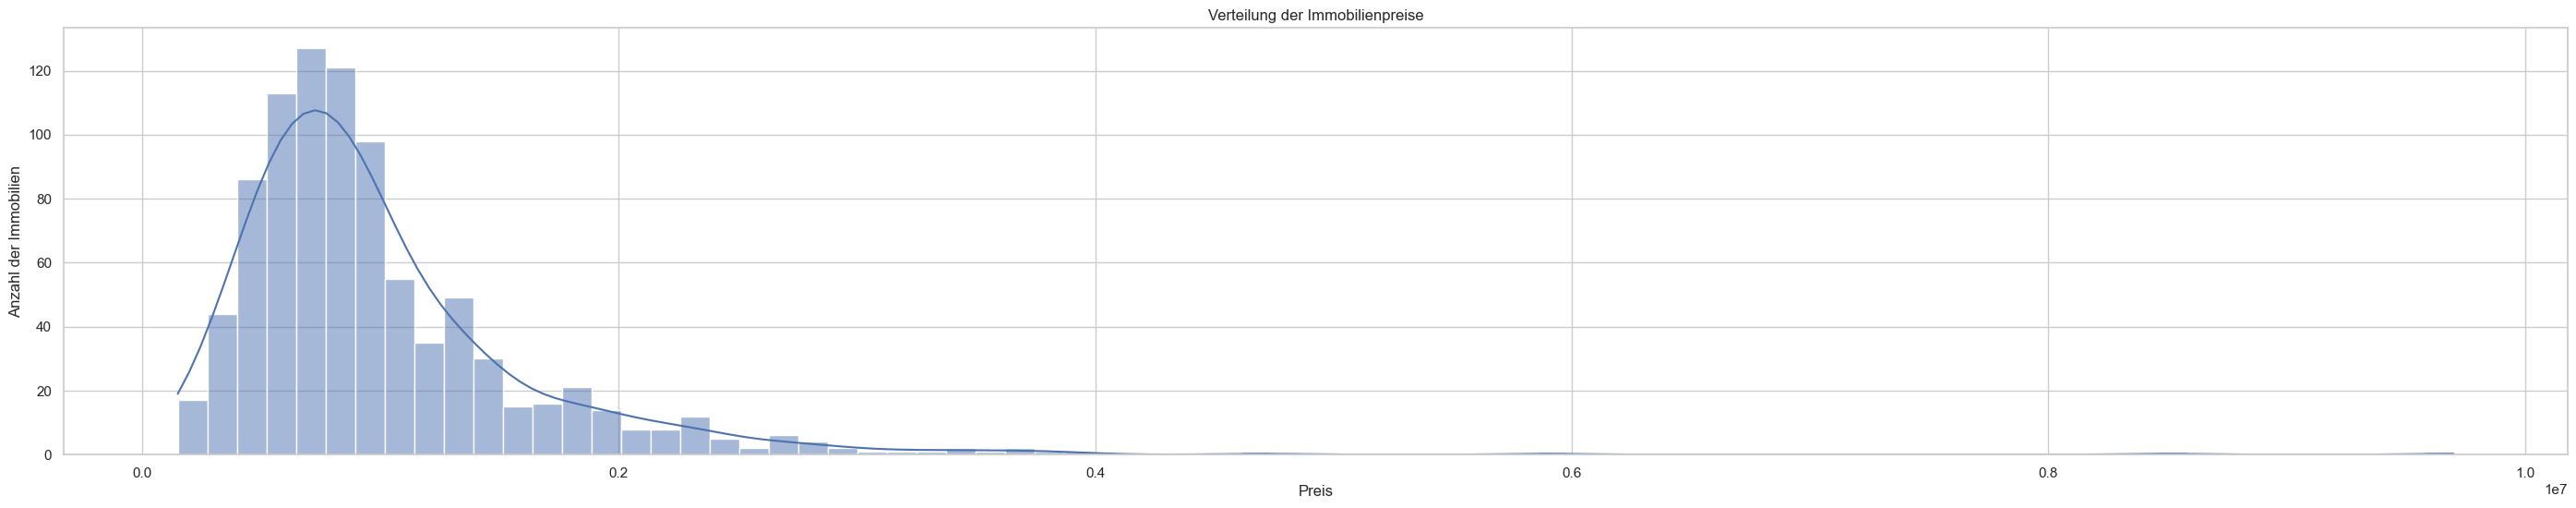

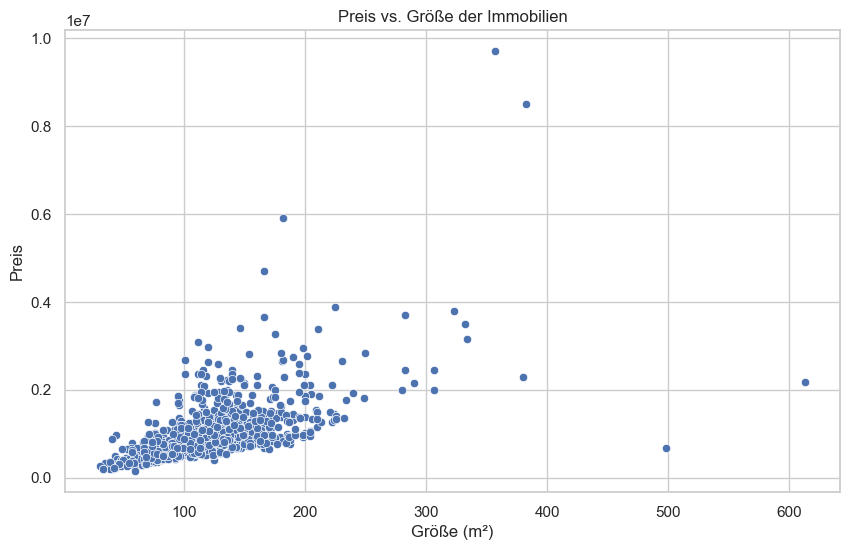

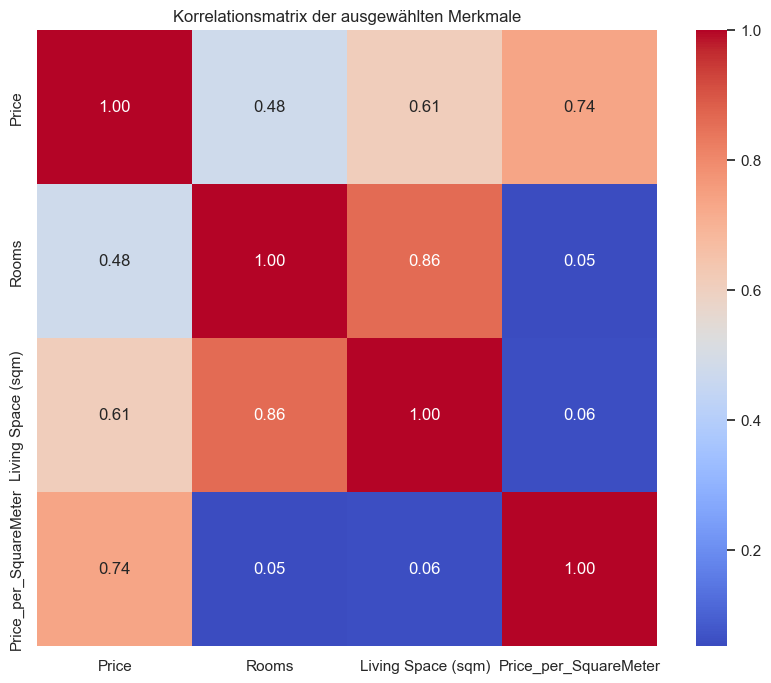

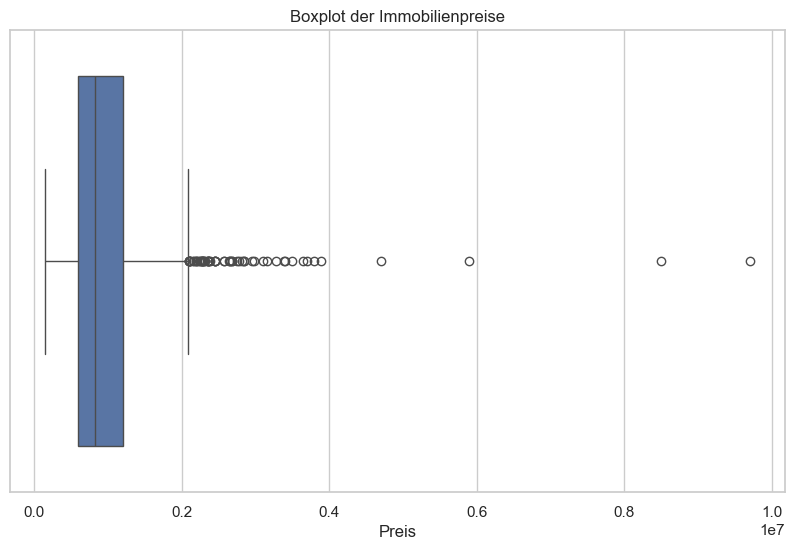

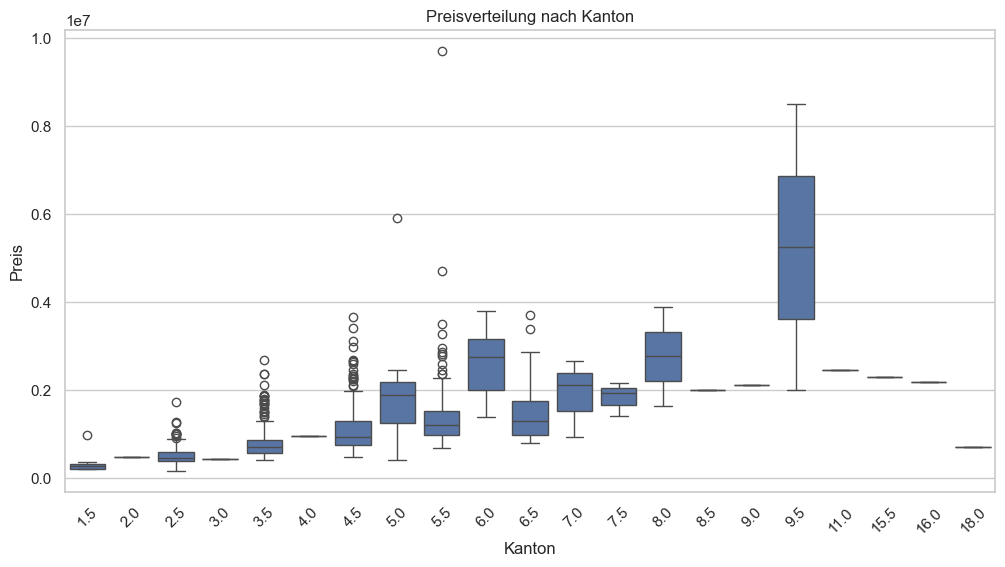

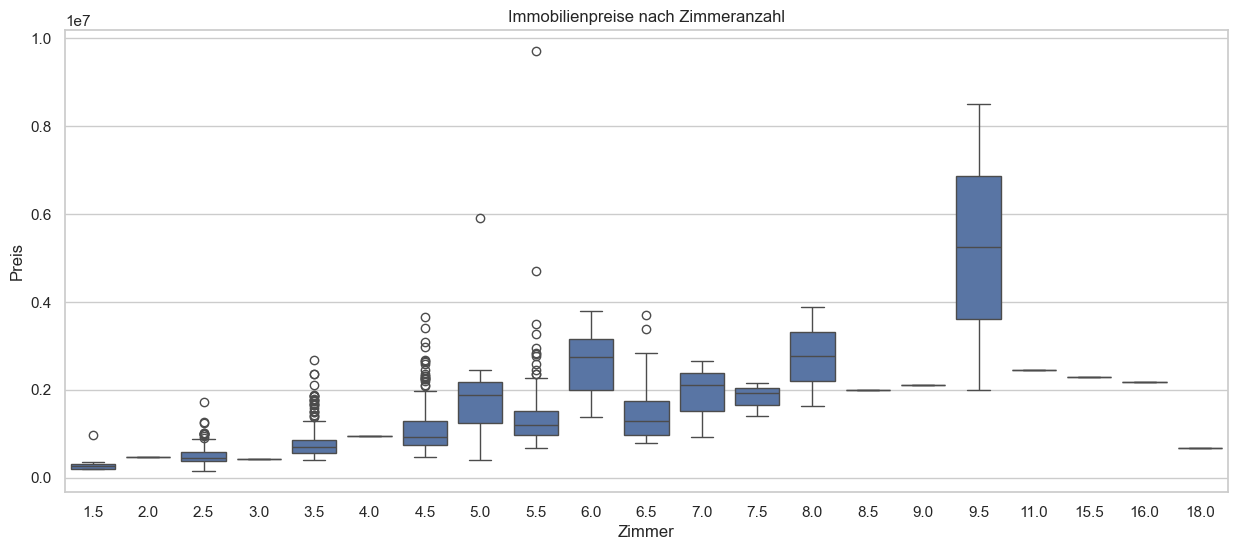

In [3]:
#Datenanalyse und Visualisierung
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df_clean = pd.read_csv('Cleaned_UserAgent_immoscout24.csv', sep=';')
df_filtered= pd.read_csv('Filtered_UserAgent_immoscout24.csv', sep=';')
# Stil für die Plots festlegen
sns.set(style="whitegrid")

print(df_clean.describe())
print(df_clean.info())

max_price = df_clean['Price'].max()
print("Maximaler Preis im Datensatz: ", max_price)

# Histogramm der Preise
plt.figure(figsize=(35, 6))
sns.histplot(df_clean['Price'], kde=True)
plt.title('Verteilung der Immobilienpreise')
plt.xlabel('Preis')
plt.ylabel('Anzahl der Immobilien')
plt.show()

# Scatter Plot für Preis vs. Größe
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Living Space (sqm)', y='Price', data=df_clean)
plt.title('Preis vs. Größe der Immobilien')
plt.xlabel('Größe (m²)')
plt.ylabel('Preis')
plt.show()

# Korrelationsmatrix
relevant_columns = ['Price', 'Rooms', 'Living Space (sqm)', 'Price_per_SquareMeter']
correlation_matrix = df_clean[relevant_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korrelationsmatrix der ausgewählten Merkmale')
plt.show()


# Angenommen, Ihr DataFrame heißt df
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['Price'])
plt.title('Boxplot der Immobilienpreise')
plt.xlabel('Preis')
plt.show()


# Überblick über die Preisverteilung nach Kanton
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rooms', y='Price', data=df_clean)
plt.xticks(rotation=45)
plt.title('Preisverteilung nach Kanton')
plt.xlabel('Kanton')
plt.ylabel('Preis')
plt.show()


# Boxplot für Preise nach Zimmerzah
plt.figure(figsize=(15, 6))
sns.boxplot(x='Rooms', y='Price', data=df_clean)
plt.title('Immobilienpreise nach Zimmeranzahl')
plt.xlabel('Zimmer')
plt.ylabel('Preis')
plt.show()
